In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [65]:
cal = pd.read_csv('./calendar.csv')
listing = pd.read_csv('./listings.csv')
review = pd.read_csv('./reviews.csv')

In [67]:
def price_to_numeric(price_str):
    try:
        return float(price_str[1:])
    except:
        return None

In [68]:
def clean_calendar_df(df):
  # Cleans calendar.csv Pandas DataFrame
    
    df.date=pd.to_datetime(df.date)
    df.price=df.price.apply(lambda x: price_to_numeric(x))
    df.available=df.available.apply(lambda x: True if x=='t' else False)
    
    return df

In [69]:
cal=clean_calendar_df(cal)

In [115]:
def clean_listing_df(df,date_columns,t_f_columns):
  
   # Cleans listing.csv Pandas DataFrame

    for date_col in date_columns:
        df[date_col]=pd.to_datetime(df[date_col])
    
    for t_f_col in t_f_columns:
        df[t_f_col]=df[t_f_col].apply(lambda x: True if x=='t' else False)
    
    df.price=df.price.apply(lambda x: price_to_numeric(x))

    
    return df

In [116]:
date_columns_listing=['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
true_false_listing_columns=['host_is_superhost','host_has_profile_pic','host_identity_verified',
                            'is_location_exact','has_availability','requires_license','instant_bookable',
                            'require_guest_profile_picture','require_guest_phone_verification']


listing=clean_listing_df(listing,date_columns_listing,true_false_listing_columns)

In [86]:
categorical_listing=['host_response_time',
                     'host_is_superhost',
                     'host_neighbourhood',
                     'neighbourhood',
                     'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'is_location_exact',
                     'property_type',
                     'room_type',
                     'bed_type',
                     'calendar_updated',
                     'has_availability',
                     'instant_bookable',
                     'cancellation_policy',
                     'require_guest_profile_picture',
                     'require_guest_phone_verification'
                    ]

In [87]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [73]:
listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [38]:
cal_n=cal.merge(listing[['id','neighbourhood']],left_on='listing_id',right_on='id',how='left')

In [10]:
cal_n.groupby('neighbourhood').agg({'listing_id':'count'}).sort_values(by='listing_id',ascending=False)

,listing_id
neighbourhood,
Capitol Hill,128115
Ballard,77745
Belltown,74460
Minor,70080
Queen Anne,68255
...,...
Pike Market,730
South Beacon Hill,730
Roxhill,365


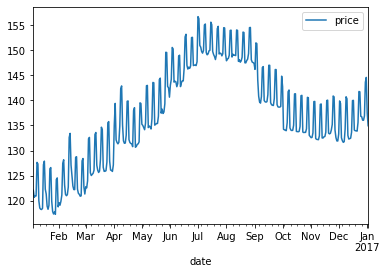

In [88]:
cal_n.groupby(['date']).agg({'price':'mean'}).plot()

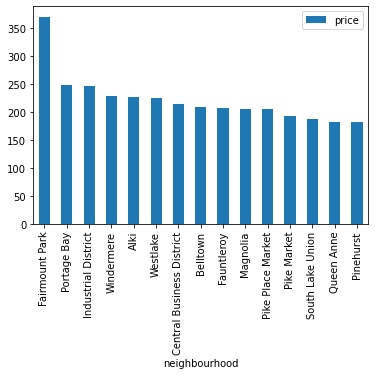

In [12]:
cal_n.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(15).plot.bar()

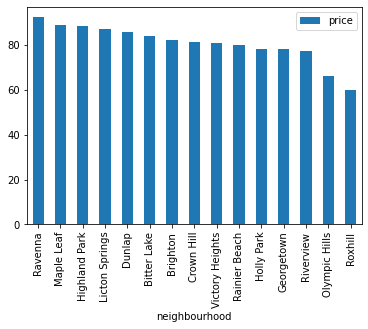

In [13]:
cal_n.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).tail(15).plot.bar()

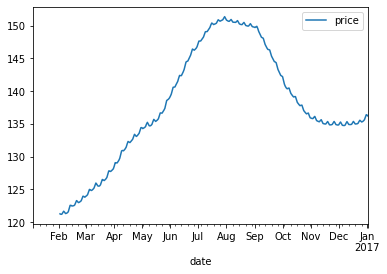

In [120]:
cal_n.groupby(['date']).agg({'price':'mean'}).rolling(window=30).mean().plot()

In [91]:
cal_n.groupby(['neighbourhood','listing_id']).sum()

,listing_id,date,available,price,id,neighbourhood
0,241032,2016-01-04,True,85.0,241032,Queen Anne
1,241032,2016-01-05,True,85.0,241032,Queen Anne
2,241032,2016-01-06,False,NaN,241032,Queen Anne
3,241032,2016-01-07,False,NaN,241032,Queen Anne
4,241032,2016-01-08,False,NaN,241032,Queen Anne


In [92]:
avail=cal_n.groupby(['neighbourhood','listing_id']).sum()[['available']]
avail_n=avail.reset_index().groupby('neighbourhood').mean()[['available']]

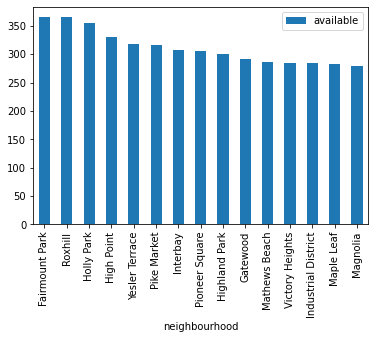

In [93]:
avail_n.sort_values(by='available',ascending=False).head(15).plot.bar()

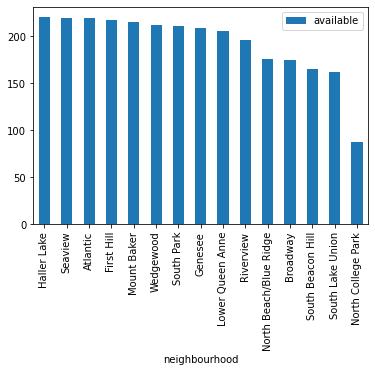

In [94]:
avail_n.sort_values(by='available',ascending=False).tail(15).plot.bar()

In [98]:
revenue=avail.reset_index().merge(listing[['id','price']],left_on='listing_id',right_on='id',how='left')

In [100]:
revenue['year_revenue']=(365-revenue.available)*revenue.price

In [105]:
revenue_mean=revenue.groupby('neighbourhood').mean()[['year_revenue']]

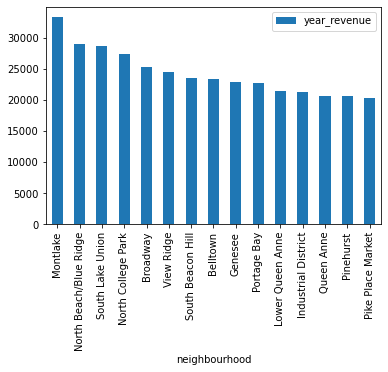

In [107]:
revenue_mean.sort_values(by='year_revenue',ascending=False).head(15).plot.bar()

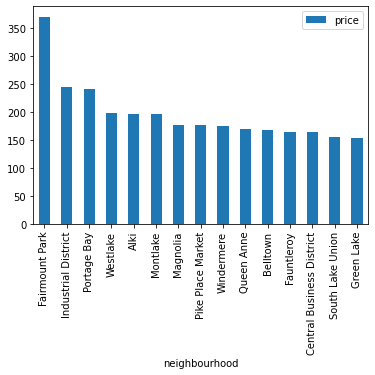

In [84]:
price_n=listing.groupby('neighbourhood').mean()[['price']]
price_n.sort_values(by='price',ascending=False).head(15).plot.bar()

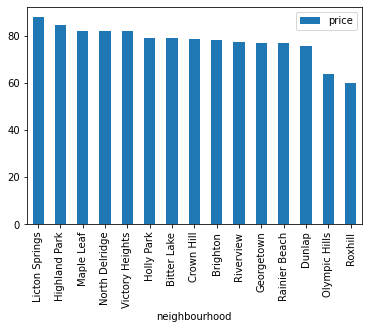

In [85]:
price_n.sort_values(by='price',ascending=False).tail(15).plot.bar()

In [121]:
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]


Text(0.5, 0, 'group')

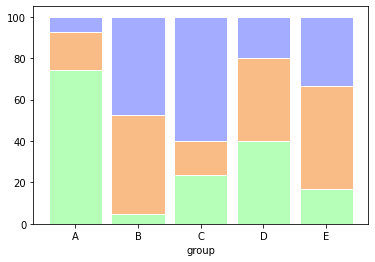

In [122]:
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
